# Hypothesis Testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf
import datetime as dt

from scipy import stats
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import f

from statsmodels.stats.stattools import jarque_bera

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

## Draft Zone

### Two-tailed test

In [11]:
ibm_df = pd.read_csv('../data/IBM_2013-09-01_2013-11-11_1d.csv', index_col=0, parse_dates=True)

returns_sample = np.log(ibm_df['Close'].div(ibm_df['Close'].shift(1)))

ibm_df.shape

(49, 7)

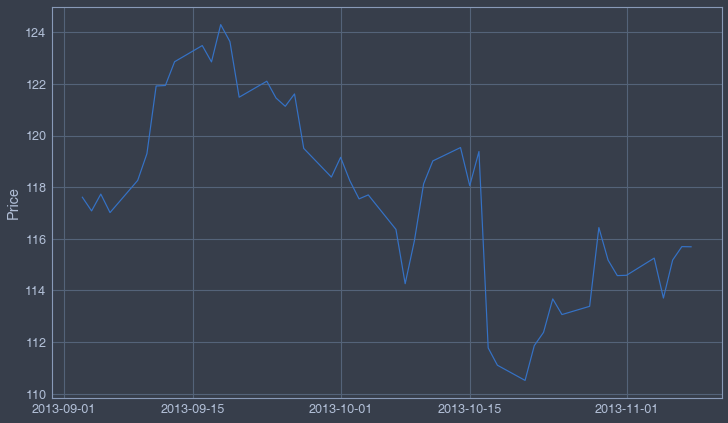

In [15]:
plt.plot(ibm_df['Close'].index, ibm_df['Close'].values)
plt.ylabel('Price');

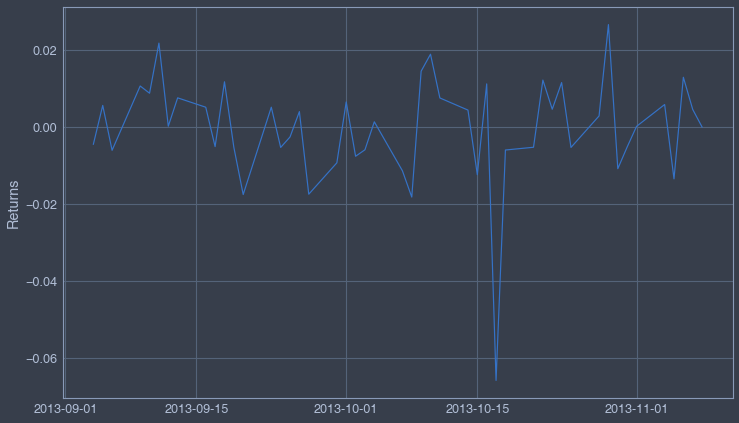

In [16]:
plt.plot(returns_sample.index, returns_sample.values)
plt.ylabel('Returns');

In [17]:
n = len(returns_sample)

test_statistic = ((returns_sample.mean() - 0) / (returns_sample.std()/np.sqrt(n)))
p_val = 2 *(1 - t.cdf(test_statistic, n - 1))

print(f't test statistic: {test_statistic}\np-value is: {p_val}')

t test statistic: -0.17061092833002253
p-value is: 1.134753160065455


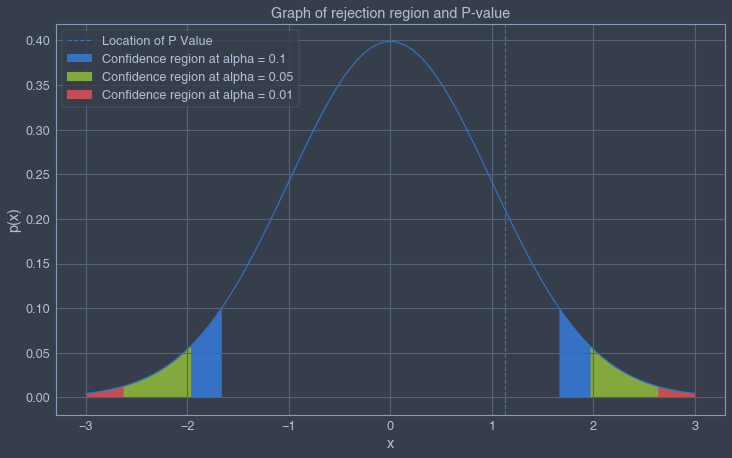

In [18]:
x = np.linspace(-3, 3, 100)
norm_pdf = lambda x: (1/np.sqrt(2 * np.pi)) * np.exp(-x * x / 2)
y = norm_pdf(x)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(x, y)

ax.fill_between(x, 0, y, where = x > 1.645, label = 'Confidence region at alpha = 0.1')
ax.fill_between(x, 0, y, where = x < -1.645, color = 'b')

ax.fill_between(x, 0, y, where = x > 1.96, label = 'Confidence region at alpha = 0.05', color = 'g')
ax.fill_between(x, 0, y, where = x < -1.96, color = 'g')

ax.fill_between(x, 0, y, where = x > 2.576, label = 'Confidence region at alpha = 0.01', color='r')
ax.fill_between(x, 0, y, where = x < -2.576, color = 'r')
plt.axvline(p_val, linestyle = 'dashed', label = 'Location of P Value')

plt.title('Graph of rejection region and P-value')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

### Hypothesis Testing on Means

In [10]:
bac_df = pd.read_csv('../data/BAC_2002-01-01_2022-12-31_1d.csv', index_col=0, parse_dates=True)
bac_returns = np.log(bac_df['Close'].div(bac_df['Close'].shift(1))).dropna()

bk_df = pd.read_csv('../data/BK_2002-01-01_2022-12-31_1d.csv', index_col=0, parse_dates=True)
bk_returns = np.log(bk_df['Close'].div(bk_df['Close'].shift(1))).dropna()

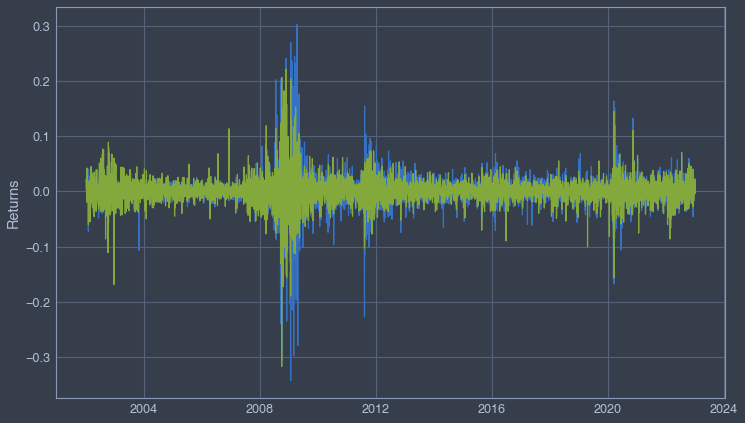

In [11]:
plt.plot(bac_returns.index, bac_returns.values)
plt.plot(bk_returns.index, bk_returns.values)
plt.ylabel('Returns');

In [12]:
# Sample mean values
mu_bac, mu_bk = bac_returns.mean(), bk_returns.mean()
s_bac, s_bk = bac_returns.std(), bk_returns.std()
n_bac = len(bac_returns)
n_bk = len(bk_returns)

test_statistic = ((mu_bac - mu_bk) - 0)/((s_bac**2/n_bac) + (s_bk**2/n_bk))**0.5
df = ((s_bac**2/n_bac) + (s_bk**2/n_bk))**2/(((s_bac**2 / n_bac)**2 /n_bac)+((s_bk**2 / n_bk)**2/n_bk))

print(f't test statistic: {test_statistic}')
print(f'Degrees of freedom (modified): {df}')

print('\n----------------------------------------------------------------\n')

if -1.960 < test_statistic < 1.960:
    print('Failed to reject H0. Difference between mean of BAC and mean BK not significantly different from zero.')
else:
    print('Reject H0. Difference between mean of BAC and mean BK significantly different from zero.')

t test statistic: 0.00903590245658047
Degrees of freedom (modified): 10082.927928595092

----------------------------------------------------------------

Failed to reject H0. Difference between mean of BAC and mean BK not significantly different from zero.


## Comparing Two Variances

In [3]:
bac_df = pd.read_csv('../data/BAC_2002-01-01_2022-12-31_1d.csv', index_col=0, parse_dates=True)
bac_returns = np.log(bac_df['Close'].div(bac_df['Close'].shift(1))).dropna()

bk_df = pd.read_csv('../data/BK_2002-01-01_2022-12-31_1d.csv', index_col=0, parse_dates=True)
bk_returns = np.log(bk_df['Close'].div(bk_df['Close'].shift(1))).dropna()

In [5]:
bac_std = bac_returns.std()
bk_std = bk_returns.std()

bac_std, bk_std

(0.02855928082213299, 0.022819203398459973)

In [9]:
test_statistic = (bac_std / bk_std)**2
df1 = len(bac_returns) - 1
df2 = len(bk_returns) - 1
upper_crit_value = f.ppf(0.975, df1, df2)
lower_crit_value = f.ppf(0.025, df1, df2)

print(f'F Test statistic: {test_statistic}')
print (f'Degrees of freedom for SPY: {df2}')
print (f'Degrees of freedom for AAPL: {df1}')
print (f'Upper critical value at a = 0.05 with df1 = {df1} and df2 = {df2}: {upper_crit_value}')
print (f'Lower critical value at a = 0.05 with df1 = {df1} and df2 = {df2}: {lower_crit_value}')

print('---------------------------')
if test_statistic > upper_crit_value or test_statistic < lower_crit_value:
    print('H0 ---> REJECT')
else:
    print('H0 ---> FAIL to reject')

F Test statistic: 1.5663671801214152
Degrees of freedom for SPY: 5286
Degrees of freedom for AAPL: 5286
Upper critical value at a = 0.05 with df1 = 5286 and df2 = 5286: 1.055401669153729
Lower critical value at a = 0.05 with df1 = 5286 and df2 = 5286: 0.9475065553021603
---------------------------
H0 ---> REJECT


<hr>

## Class

In [2]:
class DwdStocks:
    def __init__(self, tickers_list, start, end, mock=False):  
        self.test_tickers_list = ['AAPL', 'IBM', 'MCD']
        if mock:
            if tickers_list or len(tickers_list) <= 3:
                self.tickers_list = self.test_tickers_list[:len(tickers_list)]
            else:
                self.tickers_list = self.test_tickers_list
            self.get_mock_data()
        else:
            self.tickers_list = tickers_list
            self.start   = start
            self.end     = end
            self.get_quotes()

    def get_quotes(self):
        self.data = yf.download(
            self.tickers_list,
            start=self.start,
            end=self.end,
            
            auto_adjust=True,
            progress=False,
            show_errors=True
        )
    
    def get_mock_data(self):
        print('You are using TEST MODE.')
        if len(self.tickers_list) == 1:
            csv = '../data/AAPL_2021-01-01_2022-12-31_1d.csv'
            self.data = pd.read_csv(csv, index_col=0, parse_dates=True)
        elif len(self.tickers_list) == 2:
            csv = ('../data/AAPL_IBM_2021-01-01_2022-12-31_1d.csv')
            self.data = pd.read_csv(csv, index_col=0, header=[0,1], parse_dates=True)
        elif len(self.tickers_list) == 3:
            csv = '../data/AAPL_IBM_MCD_2021-01-01_2022-12-31_1d.csv'
            self.data = pd.read_csv(csv, index_col=0, header=[0,1], parse_dates=True)
        else:
            print('The maximum length of the ticker list for testing is 3.')
    
        print(f'tickers: {self.tickers_list} | date: from 2021-01-01 to 2022-12-31 | interval: 1day')
        
    def show_data(self, limit=5):
        return self.data.head(limit)

In [3]:
# ???
H = [
    { 'H0': 'equal',            'Ha': 'not equal' },
    { 'H0': 'less or equal',    'Ha': 'greater than' },
    { 'H0': 'greater or equal', 'Ha': 'less than' },
]

def get_all_Ha():
    pass

def get_all_H0():
    pass

def Ha_has(hypothesis):
    pass

def H0_has(hypothesis):
    pass

In [4]:
class H0_Ha(DwdStocks):
    __HYPOTHESES = [
            'not equal',
            'greater than',
            'less than'
        ]
    
    __ALPHA = {
        '90' : 1.645,
        '95' : 1.96,
        '99' : 2.576,
    }
    
    __DEFAULT = {
        'hypothesis': __HYPOTHESES[0],
        'number'    : 0,
        'parameter' : 'mean',
        'alpha'     : [90, 95, 99]
    }
    
    def __init__(self, tickers_list, start, end, mock=False):
        super().__init__(tickers_list, start, end, mock)

        self.__PARAMS = {
            'mean'    : self.mean,
            'variance': self.variance
        }
        
        self.__CONDITIONS = {
                'parameter' : H0_Ha.__DEFAULT['parameter'],
                'number'    : 0,
                'hypothesis': H0_Ha.__DEFAULT['hypothesis'],
                'alpha'     : H0_Ha.__DEFAULT['alpha']
            }
        
        self.returns_sample      = pd.DataFrame()
        self.returns_sample_info = pd.DataFrame()
        self.gather_info()
        self.help_me()
        self.plot = False
    
    def gather_info(self):
        if len(self.tickers_list) == 1:
            self.returns_sample = np.log(
                self.data['Close'].div(
                    self.data['Close'].shift(1)
                )
            ).dropna()
            self.returns_sample_info = pd.DataFrame({
                'ticker': self.tickers_list,
                'mean'  : [self.returns_sample.mean()],
                'std'   : [self.returns_sample.std()],
                'len'   : [len(self.returns_sample)]
            })
        else:
            for i in self.tickers_list:
                self.returns_sample[i] = np.log(
                    self.data['Close'][i].div(
                        self.data['Close'][i].shift(1)
                    )
                ).dropna()
            self.returns_sample_info = pd.DataFrame({
                'ticker': self.tickers_list,
                'mean'  : list(self.returns_sample.mean()),
                'std'   : list(self.returns_sample.std()),
                'len'   : list([len(self.returns_sample)]*len(self.tickers_list))
            })
    
    def get_ticker_info(self, ticker):        
        return self.returns_sample_info[self.returns_sample_info['ticker']==ticker]
    
    def __are_these_normal(self, data):
        _, p, _, _ = jarque_bera(data)
        if p < 0.5: return False
        return True
    
    def __get_tickers_pairs(self):
        if len(self.tickers_list) > 1:
            tickers_pairs = [(a, b) for idx, a in enumerate(self.tickers_list) for b in self.tickers_list[idx + 1:]]
            return tickers_pairs
        return []
    
    # HYPOTHESES ----------------------------------------- #
    def get_pvalue(self, test_statistic, length):
        hypothesis = self.__CONDITIONS['hypothesis']
        if hypothesis == 'not equal' or hypothesis == 'less than':
            p_value = 1 - t.cdf(test_statistic, length - 1)
        elif hypothesis == 'not equal' or hypothesis == 'greater than':
            p_value = t.cdf(test_statistic, length - 1)
        elif hypothesis == 'not equal':
            p_value = 2 * (1 - t.cdf(test_statistic, length - 1))

        return p_value
    
    # PARAMETERS ----------------------------------------- #
    def mean(self):
        if self.__CONDITIONS['number'] != None:
            for i in self.tickers_list:
                ticker_info = self.get_ticker_info(i)
                length = ticker_info['len'].values[0]
                mean   = ticker_info['mean'].values[0]
                std    = ticker_info['std'].values[0]
                SE     = std / np.sqrt(length)
                
                test_statistic = ((mean - self.__CONDITIONS['number']) / SE)
                
                p_value = self.get_pvalue(test_statistic, length)
                
                critical_values = []
                conclusions = []
                for a in self.__CONDITIONS['alpha']:
                    if p_value > (1 - a/100):
                        conclusions.append(f'With α = {round(1 - a/100, 2)} we FAIL TO REJECT H0')
                    else:
                        conclusions.append(f'With α = {round(1 - a/100, 2)} we REJECT H0')

                    critical_values.append(stats.norm.interval(a/100, loc=mean, scale=SE))
                    
                test_result = {
                    'Ticker'         : i,
                    'Test Statistic' : test_statistic,
                    'p-value'        : p_value,
                    'Critical Values': critical_values,
                    'Conclusion'     : conclusions,
                }
                self.show_test_result(test_result)
                self.visualize(p_value, self.__CONDITIONS['alpha'])
        else:
            tickers_pairs = self.__get_tickers_pairs()
            for i, j in tickers_pairs:                
                ticker_info_i = self.get_ticker_info(i)
                ticker_info_j = self.get_ticker_info(j)
                
                mean_i, mean_j = ticker_info_i['mean'].values[0], ticker_info_j['mean'].values[0]
                std_i, std_j = ticker_info_i['std'].values[0], ticker_info_j['std'].values[0]
                len_i = ticker_info_i['len'].values[0]
                len_j = ticker_info_j['len'].values[0]
                
                # NOT EQUAL
                test_statistic = ((mean_i - mean_j) - 0)/((std_i**2/len_i) + (std_j**2/len_j))**0.5
                df = ((std_i**2/len_i) + (std_j**2/len_j))**2/(((std_i**2 / len_i)**2 /len_i)+((std_j**2 / len_j)**2/len_j))
                
                test_result = {
                    'Tickers'         : (i, j),
                    'Test Statistic'  : test_statistic,
                    'Degrees of freedom (modified): ': df,
#                     'p-value'         : p_value,
#                     'Critical Values' : critical_values,
#                     'Conclusion'      : conclusions,
                }
                self.show_test_result(test_result)
                
    
    def variance(self):
        test_results = []
        if self.__CONDITIONS['number'] != None:
            for i in self.tickers_list:
                ticker_info = self.get_ticker_info(i)
                length = ticker_info['len'].values[0]
                std   = ticker_info['std'].values[0]
                
                test_statistic = (length - 1) * std**2 / self.__CONDITIONS['number']
                
                critical_values = []
                conclusions = []
                for a in self.__CONDITIONS['alpha']:
                    critical_value = chi2.ppf(a/100, length - 1)
                    
                    if test_statistic > critical_value:
                        conclusions.append(f'With α = {round(1 - a/100, 2)} we FAIL TO REJECT H0')
                    else:
                        conclusions.append(f'With α = {round(1 - a/100, 2)} we REJECT H0')
                    
                    critical_values.append(critical_value)
                
                test_result = {
                    'Ticker'          : i,
                    'Test Statistic'  : test_statistic,
                    'Critical Values' : critical_values,
                    'Conclusions'     : conclusions,
                }
                
                self.show_test_result(test_result)
        else:
            self.show_test_result({ 'Possible pairs: ': f'{self.__get_tickers_pairs()}' })
    
    # TEST ----------------------------------------------- #
    def test(self, conditions=[
        {
            'parameter' : __DEFAULT['parameter'],
            'number'    : 0,
            'hypothesis': __DEFAULT['hypothesis'],
            'alpha'     : __DEFAULT['alpha']
        }
    ]):
        if conditions:
            for c in conditions:
                if c['parameter'] in self.__PARAMS.keys() and c['hypothesis'] in H0_Ha.__HYPOTHESES:
                    self.__CONDITIONS = c
                    self.__PARAMS[c['parameter']]()
                else:
                    print('Conditions are wrong.')
                    self.help_me()
                    
    # ----------------------------------------------- #
    def get_test_name(self):
        if self.__CONDITIONS['number'] != None:
            return f"Ha: {self.__CONDITIONS['parameter']} {self.__CONDITIONS['hypothesis']} {self.__CONDITIONS['number']}"
        
        if len(self.tickers_list) > 1:
            pass # i have no idea
    
    # ----------------------------------------------- #  
    def visualize(self, p_value, distribution='normal'):
        if distribution == 'chi-2':
            pass
        
#         if distribution == 'normal':
        x = np.linspace(-3, 3, 100)
        norm_pdf = lambda x: (1/np.sqrt(2 * np.pi)) * np.exp(-x * x / 2)
        y = norm_pdf(x)
        
        fig, ax = plt.subplots(1, 1, sharex=True)
        ax.plot(x, y)
        
        colors = ['b', 'g', 'r']
        for c, i in enumerate(self.__CONDITIONS['alpha']):
            ax.fill_between(x, 0, y, where= x > H0_Ha.__ALPHA[str(i)], label=f'Confidence region at alpha = {round(1 - i/100, 2)}')
            ax.fill_between(x, 0, y, where= x < -H0_Ha.__ALPHA[str(i)], color=colors[c])
        
        plt.axvline(p_value, linestyle = 'dashed', label = 'Location of P Value')
        plt.title(self.get_test_name())
        plt.xlabel('x')
        plt.ylabel('p(x)')
        plt.legend();
    
    # STDout methods ----------------------------------------------- #
    def show_test_result(self, message_cnt):
        print('TEST')
        print(self.get_test_name())
        for res in message_cnt.items():
            print(f'{res[0]}: {res[1]}')
        print('===========================================')
        
    def show_result(self):        
        if self.plot:
            self.visualize()
        
        return self.returns_sample_info
    # ----------------------------------------------- #
    
    def help_me(self):
        print(f'Valid parameters: {*self.__PARAMS.keys(),}')
        print(f'Valid hypotheses: {*H0_Ha.__HYPOTHESES,}')
            
            

In [5]:
st = H0_Ha(['t', 't', 't'], dt.datetime(2021, 1, 1), dt.datetime(2022, 1, 1), mock=True)

You are using TEST MODE.
tickers: ['AAPL', 'IBM', 'MCD'] | date: from 2021-01-01 to 2022-12-31 | interval: 1day
Valid parameters: ('mean', 'variance')
Valid hypotheses: ('not equal', 'greater than', 'less than')


TEST
Ha: mean not equal 0
Ticker: AAPL
Test Statistic: 0.036656664794872215
p-value: 0.4853866813644995
Critical Values: [(-0.0013933256550369183, 0.0014568435855997171), (-0.0016663340959975684, 0.0017298520265603679), (-0.002199913607223484, 0.0022634315377862836)]
Conclusion: ['With α = 0.1 we FAIL TO REJECT H0', 'With α = 0.05 we FAIL TO REJECT H0', 'With α = 0.01 we FAIL TO REJECT H0']
TEST
Ha: mean not equal 0
Ticker: IBM
Test Statistic: 0.8153412096308087
p-value: 0.20763223029609146
Critical Values: [(-0.0005485096330389942, 0.0016267876632599253), (-0.0007568742855730427, 0.0018351523157939741), (-0.0011641111792920179, 0.0022423892095129495)]
Conclusion: ['With α = 0.1 we FAIL TO REJECT H0', 'With α = 0.05 we FAIL TO REJECT H0', 'With α = 0.01 we FAIL TO REJECT H0']
TEST
Ha: mean not equal 0
Ticker: MCD
Test Statistic: 1.0883732993213853
p-value: 0.13847681092660757
Critical Values: [(-0.0002758140188451447, 0.0013546971303758253), (-0.0004319953783486753, 0.00151087848987935

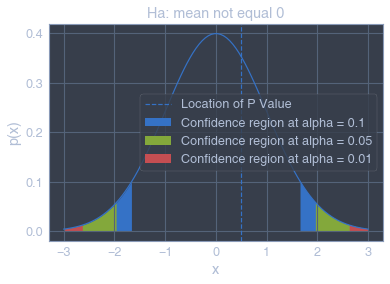

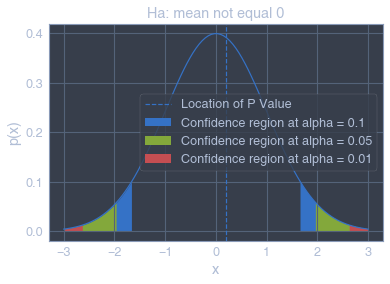

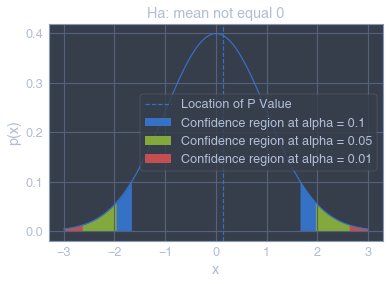

In [12]:
st.test()

In [29]:
st.test(conditions=[
    {
        'parameter' : 'mean',
        'number'    : None,
        'hypothesis': 'not equal',
        'alpha'     : [90, 95, 99]
    },
    
#     {
#         'parameter' : 'variance',
#         'number'    : 0,
#         'hypothesis': 'not equal',
#         'alpha'     : [90, 95, 99]
#     },
#     {
#         'parameter' : 'median',
#         'number'    : 0,
#         'hypothesis': 'equal',
#         'alpha'     : [90, 95, 99]
#     },
    
])

TEST
None
Tickers: ('AAPL', 'IBM')
Test Statistic: -0.4655304881535186
Degrees of freedom (modified): : 938.6663774605488
TEST
None
Tickers: ('AAPL', 'MCD')
Test Statistic: -0.5086267872893449
Degrees of freedom (modified): : 798.7911062198044
TEST
None
Tickers: ('IBM', 'MCD')
Test Statistic: -0.00036610404477383163
Degrees of freedom (modified): : 930.7460117671184


In [ ]:
Ha_l = [
    'mean != ',
    'mean < ',
    'mean > ',

    'variance != ',
    'variance < ',
    'variance > ',

    'mean() == mean()',
    'mean() != mean()',
    'mean() <= mean()',
    'mean() >= mean()',

    'variance() == variance()',
    'variance() != variance()',
    'variance() <= variance()',
    'variance() >= variance()',
    
    'SpearmanCorrelation???'
]